In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

2024-11-08 09:53:30.124617: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 09:53:30.149156: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 09:53:33.477089: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 09:53:37.221008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731059618.176574    3255 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731059618.33

In [ ]:
import sys
print(sys.executable)


In [2]:

# Get the current working directory
current_folder = os.getcwd()
relative_path = '../RawData/2000_to_2024.xlsx'
full_path = os.path.join(current_folder, relative_path)
# get raw data from excel file
df = pd.read_excel(full_path)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
## Preprocessing
# 1. Drop signals with is_closed = False
df = df[df['is_closed'] == True]
# 2. Drop signals with same signal_time
df = df.drop_duplicates(subset=['signal_time'])
# 3. Normalize rsi_value due to trend_type : if trend_type = -1 then rsi_value = 100 - rsi_value
df['rsi_value'] = df.apply(lambda x: 100 - x['rsi_value'] if x['trend_type'] == -1 else x['rsi_value'], axis=1)
# 4. Drop columns that are not needed including 'is_closed', 'trend_type', 'signal_time', 'signal_price',
# 'tp_1_hit', 'tp_2_hit', 'tp_3_hit', 'tp_4_hit', 'tp_5_hit', 'tp_6_hit', 'tp_7_hit', 'tp_8_hit', 
# last_stop_tp_1_number, last_stop_tp_2_number, last_stop_tp_3_number, last_stop_tp_4_number, last_stop_tp_5_number,
# last_stop_tp_6_number, last_stop_tp_7_number, last_stop_tp_8_number, rd_filter_passed , hd_filter_passed
df = df.drop(columns=['max_price_move','pair_name','max_seen_value','min_seen_value','sl_2_hit','sl_1_hit', 'is_closed', 'trend_type', 'signal_time', 'signal_price', 'tp_1_hit', 'tp_2_hit', 'tp_3_hit', 'tp_4_hit', 'tp_5_hit', 'tp_6_hit', 'tp_7_hit', 'tp_8_hit', 'last_stop_tp_1_number', 'last_stop_tp_2_number', 'last_stop_tp_3_number', 'last_stop_tp_4_number', 'last_stop_tp_5_number', 'last_stop_tp_6_number', 'last_stop_tp_7_number', 'last_stop_tp_8_number', 'rd_filter_passed', 'hd_filter_passed'])



In [ ]:
# create init data file 
# Save DataFrame as CSV
df.to_csv('processed_data_init.csv', index=False)


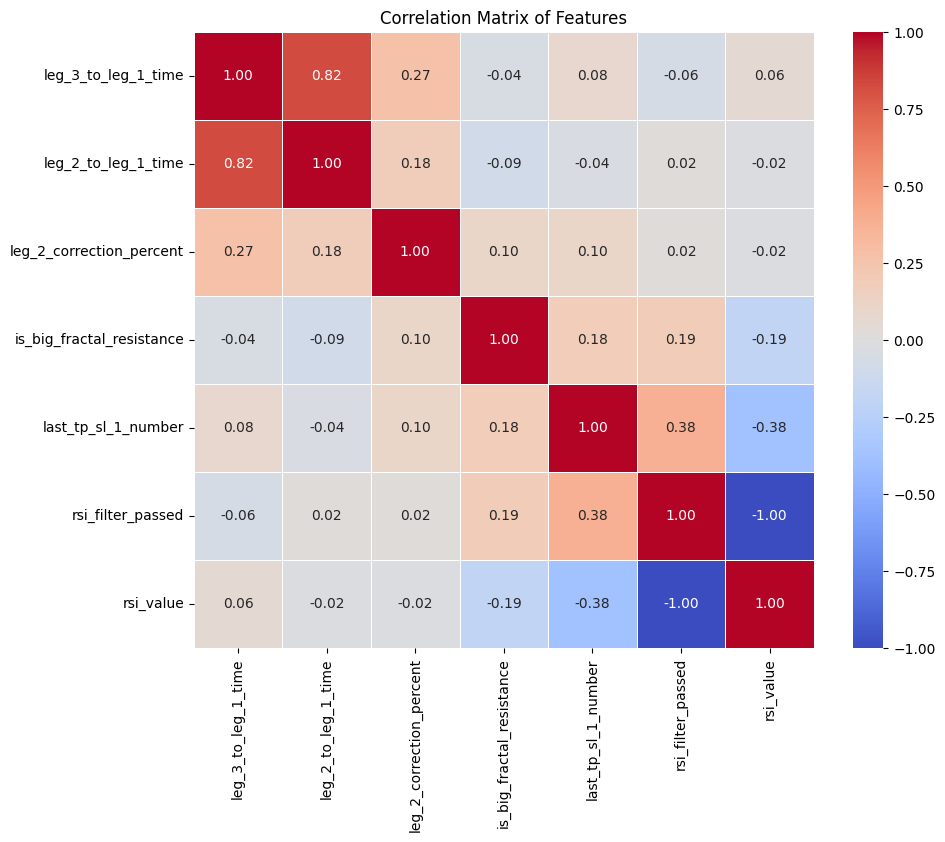

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,858 (11.16 KB)

 Trainable params: 2,858 (11.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.2273 - loss: 2.2896 - val_accuracy: 0.4500 - val_loss: 2.1270
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2664 - loss: 2.2111 - val_accuracy: 0.5000 - val_loss: 2.0654
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3141 - loss: 2.1461 - val_accuracy: 0.5000 - val_loss: 2.0068
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4211 - loss: 2.0290 - val_accuracy: 0.6000 - val_loss: 1.9464
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4180 - loss: 2.0138 - val_accuracy: 0.6000 - val_loss: 1.8902
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4258 - loss: 2.0253 - val_accuracy: 0.5500 - val_loss: 1.8331
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4328 - loss: 1.9113 - val_accuracy: 0.5500 - val_loss: 1.7767
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4914 - loss: 1.8818 - val_accuracy: 0.5500 - val_loss:

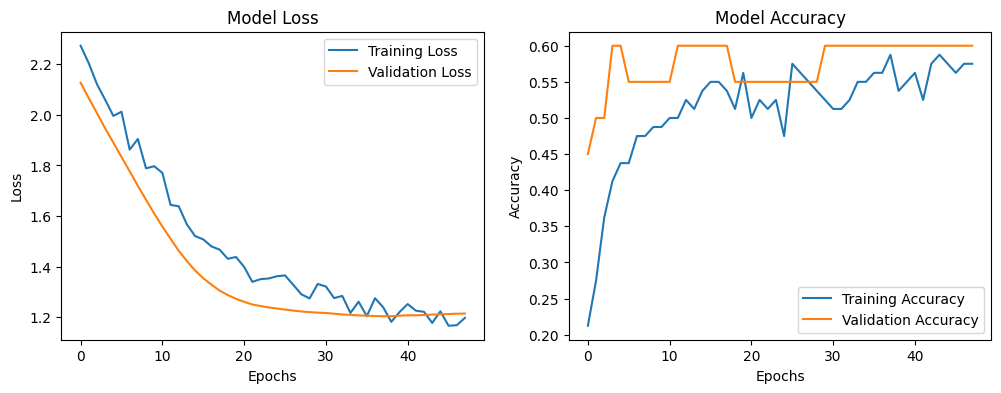

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report for last_tp_sl_1_number:
              precision    recall  f1-score   support

          -1       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         0
           2       0.85      0.92      0.88        12
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0

    accuracy                           0.60        20
   macro avg       0.17      0.15      0.15        20
weighted avg       0.61      0.60      0.59        20

Confusion Matrix for last_tp_sl_1_number:
[[ 1  1  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

In [4]:

# Load dataset
data = pd.read_csv('processed_data_init.csv')
data=data.drop(columns=['last_tp_sl_2_number'])
# Convert boolean columns to int for consistency
data['is_big_fractal_resistance'] = data['is_big_fractal_resistance'].astype(int)
data['rsi_filter_passed'] = data['rsi_filter_passed'].astype(int)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Define features and target
X = data.drop(['last_tp_sl_1_number'], axis=1)  # Drop only the target column
y = data['last_tp_sl_1_number']

# Convert target to categorical
y = to_categorical(y + 1)  # shift by 1 for range -1 to 8

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model architecture
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
dropout_1 = Dropout(0.3)(hidden_layer_1)
hidden_layer_2 = Dense(32, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(hidden_layer_2)

# Output layer for last_tp_sl_1_number prediction
output = Dense(y.shape[1], activation='softmax', name="output")(dropout_2)

# Compile model
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) - 1

# Convert y_test to original classes for comparison
y_test_classes = np.argmax(y_test, axis=1) - 1

# Classification report and confusion matrix
print("Classification Report for last_tp_sl_1_number:")
print(classification_report(y_test_classes, y_pred_classes))
print("Confusion Matrix for last_tp_sl_1_number:")
print(confusion_matrix(y_test_classes, y_pred_classes))
